In [1]:
import pandas as pd
import warnings
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/User/Desktop/IML Project/Nasa Flux Ml Project/Nasa Flux Ml Project/Dataset/exoTrain.csv')

In [3]:
df.shape

(5087, 3198)

In [4]:
df

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,1,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,1,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,1,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,1,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


In [5]:
# pd.set_option('display.max_columns',None)
df.dtypes

LABEL          int64
FLUX.1       float64
FLUX.2       float64
FLUX.3       float64
FLUX.4       float64
              ...   
FLUX.3193    float64
FLUX.3194    float64
FLUX.3195    float64
FLUX.3196    float64
FLUX.3197    float64
Length: 3198, dtype: object

### Now the target column LABEL consists of two categories 1(Does not represents exoplanet) and 2(represents the presence of exoplanet)

In [6]:
df.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,1.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,1.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,1.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,1.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,1.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,2.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


In [7]:
df.max()

LABEL              2.0
FLUX.1       1439240.5
FLUX.2       1453319.0
FLUX.3       1468429.0
FLUX.4       1495750.0
               ...    
FLUX.3193    3616292.0
FLUX.3194     288607.5
FLUX.3195     215972.0
FLUX.3196     207590.0
FLUX.3197     211302.0
Length: 3198, dtype: float64

In [8]:
df.max().max()

4299288.0

In [9]:
df.min()

LABEL             1.00
FLUX.1      -227856.26
FLUX.2      -315440.76
FLUX.3      -284001.76
FLUX.4      -234006.87
               ...    
FLUX.3193   -502889.37
FLUX.3194   -775322.00
FLUX.3195   -732006.00
FLUX.3196   -700992.00
FLUX.3197   -643170.00
Length: 3198, dtype: float64

In [10]:
df.min().min()

-2385019.12

<Axes: xlabel='count', ylabel='LABEL'>

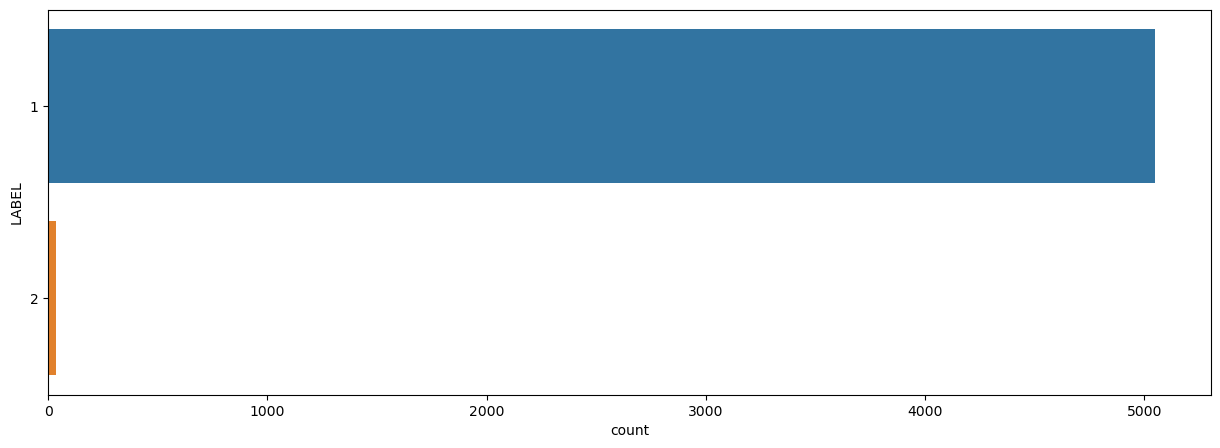

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(y='LABEL',data=df)

Here we find that the target column is very imbalanced and we need to balance the data using Statistical methods

In [12]:
df['LABEL'].value_counts()

1    5050
2      37
Name: LABEL, dtype: int64

In [13]:
df.isnull().sum()

LABEL        0
FLUX.1       0
FLUX.2       0
FLUX.3       0
FLUX.4       0
            ..
FLUX.3193    0
FLUX.3194    0
FLUX.3195    0
FLUX.3196    0
FLUX.3197    0
Length: 3198, dtype: int64

### Resampling -due to imbalance in the data (i.e higher number of No exoplanet cases)

In [14]:
x=df.drop(['LABEL'],axis=1) #Input features
y=df['LABEL'].values #Output

In [15]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
print(Counter(y))
rus=RandomOverSampler(random_state = 42)
x_over,y_over=rus.fit_resample(x,y)
print(Counter(y_over))

Counter({1: 5050, 2: 37})
Counter({2: 5050, 1: 5050})


In [16]:
# Split the data into training and testing set 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.2,random_state=42)

In [17]:
# Sanity check for the sampled data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8080, 3197)
(8080,)
(2020, 3197)
(2020,)


In [18]:
x_train

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
9137,31.29,25.14,36.93,16.63,17.01,-7.50,0.09,1.24,-19.82,-24.00,...,11.36,12.96,28.50,51.05,25.85,4.79,13.26,-17.58,13.79,0.72
3928,-1.85,-5.91,-4.90,6.54,-4.82,-6.08,-5.09,3.73,-1.79,3.12,...,12.05,17.58,4.39,20.35,12.06,14.46,-3.47,0.72,3.34,13.41
6195,-1831.31,-1781.44,-1930.84,-2016.72,-1963.31,-1956.12,-2128.24,-2188.20,-2212.82,-2320.86,...,903.82,75.61,75.61,191.77,196.16,326.61,481.28,635.63,651.68,695.74
3400,-30.20,-31.20,-28.14,-23.36,-27.17,-21.23,-21.87,-22.28,-27.92,-17.31,...,1.70,-7.34,0.60,-9.46,-4.10,4.88,-17.38,-3.45,-6.57,-1.09
9367,150725.80,129578.36,102184.98,82253.98,67934.17,48063.52,42745.02,18971.55,2983.58,-12352.67,...,-11143.45,-23351.45,-33590.27,-31861.95,-23298.89,-13056.11,379.48,9444.52,23261.02,33565.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,145.84,137.82,96.99,17.09,-73.79,-157.79,-267.71,-365.91,-385.07,-423.68,...,62.76,101.24,98.13,112.51,95.77,127.98,67.51,91.24,40.40,-10.80
5191,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
5390,207.37,195.04,150.45,135.34,104.90,59.79,42.85,52.74,18.38,-8.13,...,-13.21,-43.43,-14.77,-22.27,-0.04,19.46,9.32,23.55,-4.73,11.82
860,-113.25,-203.50,-117.69,-248.52,-209.45,-311.94,-314.89,-313.70,-254.87,-274.78,...,22.64,23.64,1.44,-36.48,118.78,306.27,-379.20,-114.28,-173.81,27.77


In [19]:
y_train

array([2, 1, 2, ..., 2, 1, 2], dtype=int64)

In [20]:
x_test

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
7401,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
5834,304.50,275.94,269.24,248.51,194.88,167.80,139.13,149.36,100.97,59.58,...,4.21,3.53,-5.13,14.56,-1.44,-10.73,3.49,0.18,-2.89,40.34
2122,-75.70,-56.95,-52.41,-47.58,-69.89,-56.59,-4.39,-26.36,-19.08,-16.12,...,-14.56,-14.62,-29.33,-59.09,-28.28,-9.55,51.02,34.13,-9.25,27.09
8788,2053.62,2126.05,2146.33,2159.84,2237.59,2236.12,2244.47,2279.61,2288.22,2221.22,...,1832.59,1935.53,1965.84,2094.19,2212.52,2292.64,2454.48,2568.16,2625.45,2578.80
304,-275.17,-255.49,-262.83,-254.95,-242.44,-226.32,-213.03,-216.88,-216.47,-199.00,...,-14.13,-8.20,-8.73,-9.95,-2.08,9.37,-38.49,-21.62,-16.18,-23.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,20.06,24.14,27.99,22.81,11.38,15.66,8.73,11.24,11.95,30.08,...,23.86,15.76,0.01,16.95,37.58,49.49,-2.08,-15.80,1.35,24.82
9134,560.19,262.94,189.94,185.12,210.38,104.19,289.56,172.06,81.75,276.88,...,106.00,-7.94,-7.94,-7.94,52.31,-165.00,7.38,-61.56,-44.75,104.50
8369,2053.62,2126.05,2146.33,2159.84,2237.59,2236.12,2244.47,2279.61,2288.22,2221.22,...,1832.59,1935.53,1965.84,2094.19,2212.52,2292.64,2454.48,2568.16,2625.45,2578.80
4993,-143.17,-102.81,-53.85,-85.81,-51.92,-37.26,-39.62,12.49,46.22,38.22,...,-13.62,-52.93,-15.68,-30.23,-38.57,-38.09,11.43,42.16,28.49,-22.21


In [21]:
y_test

array([2, 2, 1, ..., 2, 1, 2], dtype=int64)

In [22]:
# To implement KNN we need to normalize the data

In [23]:
from sklearn.preprocessing import StandardScaler, normalize

In [24]:
x_train = normalize(x_train)
x_test = normalize(x_test)

In [25]:
x_train

array([[ 0.01140795,  0.00916573,  0.01346422, ..., -0.00640945,
         0.00502766,  0.0002625 ],
       [-0.00354274, -0.01131762, -0.00938348, ...,  0.0013788 ,
         0.00639609,  0.02568009],
       [-0.07663237, -0.07454553, -0.08079727, ...,  0.02659836,
         0.02726998,  0.0291137 ],
       ...,
       [ 0.05942672,  0.05589327,  0.04311497, ...,  0.0067488 ,
        -0.00135549,  0.0033873 ],
       [-0.00240899, -0.00432874, -0.00250344, ..., -0.0024309 ,
        -0.00369719,  0.00059071],
       [-0.01137337, -0.00989612, -0.01712441, ...,  0.00188971,
         0.0046804 ,  0.00583002]])

In [27]:
x_test

array([[ 5.58887252e-02,  5.94609342e-02,  5.17516724e-02, ...,
        -2.96286241e-03, -2.96970900e-03,  2.39288368e-03],
       [ 1.55285564e-01,  1.40720849e-01,  1.37304057e-01, ...,
         9.17944222e-05, -1.47381045e-03,  2.05721499e-02],
       [-4.80878407e-02, -3.61770480e-02, -3.32930480e-02, ...,
         2.16808191e-02, -5.87599111e-03,  1.72087134e-02],
       ...,
       [ 1.45080565e-02,  1.50197473e-02,  1.51630179e-02, ...,
         1.81430890e-02,  1.85478214e-02,  1.82182566e-02],
       [-3.06712245e-02, -2.20249256e-02, -1.15362537e-02, ...,
         9.03191190e-03,  6.10339587e-03, -4.75803518e-03],
       [ 5.94267230e-02,  5.58932731e-02,  4.31149659e-02, ...,
         6.74880323e-03, -1.35549211e-03,  3.38729742e-03]])

In [34]:
std_scaler = StandardScaler()
x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.fit_transform(x_test)

In [35]:
x_train

array([[ 0.14654358,  0.11534121,  0.27011921, ..., -0.44310845,
         0.1589286 , -0.1375268 ],
       [-0.18690693, -0.35912518, -0.28299016, ...,  0.02280334,
         0.23460006,  1.15086096],
       [-1.817051  , -1.82370521, -2.01181361, ...,  1.53149849,
         1.38889059,  1.32490633],
       ...,
       [ 1.21752352,  1.19771498,  0.98792045, ...,  0.34405015,
        -0.19404894,  0.02086535],
       [-0.16162049, -0.1972381 , -0.1164344 , ..., -0.20510206,
        -0.32354088, -0.12089046],
       [-0.36155625, -0.32619815, -0.47038684, ...,  0.05336749,
         0.13972556,  0.14468424]])

In [36]:
x_test

array([[ 1.13855832,  1.35431263,  1.24331232, ..., -0.18935934,
        -0.30958882, -0.03966848],
       [ 3.37463482,  3.34293836,  3.40560415, ..., -0.06642922,
        -0.22511537,  0.8863341 ],
       [-1.20054579, -0.98617901, -0.90614857, ...,  0.80238892,
        -0.47370669,  0.71500975],
       ...,
       [ 0.20763998,  0.26672981,  0.31855319, ...,  0.66001824,
         0.90550699,  0.76643315],
       [-0.80873367, -0.63984251, -0.35625696, ...,  0.29335249,
         0.20276978, -0.40391691],
       [ 1.21815073,  1.26700338,  1.02502407, ...,  0.20147218,
        -0.21843393,  0.01098426]])

In [45]:
import math
math.sqrt(len(y_test))

44.94441010848846

# KNN - CLASSIFIER

Validation accuracy of KNN is 0.9722772277227723

Classification report :
               precision    recall  f1-score   support

           1       1.00      0.95      0.97      1043
           2       0.95      1.00      0.97       977

    accuracy                           0.97      2020
   macro avg       0.97      0.97      0.97      2020
weighted avg       0.97      0.97      0.97      2020



Text(0.5, 1.0, 'CONFUSION MATRIX')

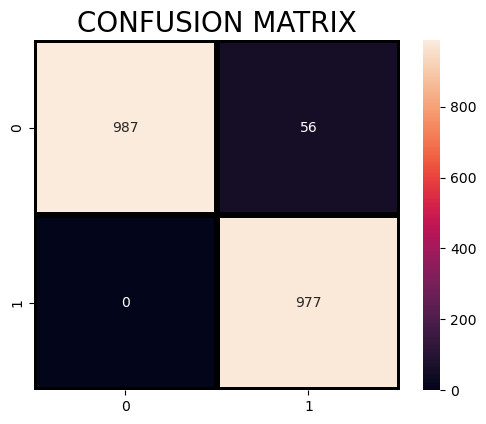

In [74]:
from sklearn.metrics import accuracy_score,recall_score, precision_score, classification_report,confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=43)

knn_model.fit(x_train,y_train)
prediction=knn_model.predict(x_test)
print('Validation accuracy of KNN is', accuracy_score(prediction,y_test))
print ("\nClassification report :\n",classification_report(y_test,prediction))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

# Decision Tree

Validation accuracy of Decision Tree is 0.8915841584158416

Classification report :
               precision    recall  f1-score   support

           1       0.97      0.81      0.89      1043
           2       0.83      0.98      0.90       977

    accuracy                           0.89      2020
   macro avg       0.90      0.89      0.89      2020
weighted avg       0.90      0.89      0.89      2020



Text(0.5, 1.0, 'CONFUSION MATRIX')

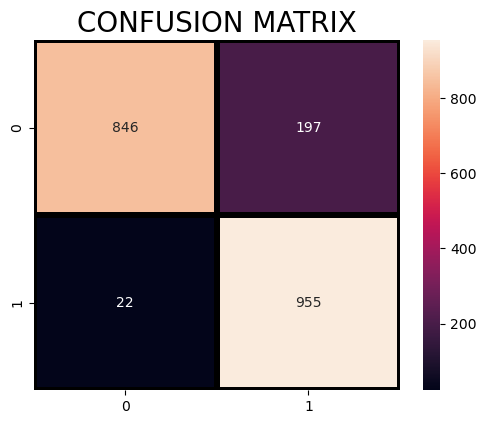

In [82]:
from sklearn.tree import DecisionTreeClassifier
ds_model = DecisionTreeClassifier(max_depth=5, random_state=13)

ds_model.fit(x_train,y_train)

prediction=ds_model.predict(x_test)

print('Validation accuracy of Decision Tree is', accuracy_score(prediction,y_test))
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

### Resampling using undersampling-due to imbalance in the data (i.e higher number of No cases)

In [83]:
x1=df.drop(['LABEL'],axis=1) #Input features
y1=df['LABEL'].values #Output

In [84]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
print(Counter(y1))
rus1=RandomUnderSampler(random_state = 42)
x_under,y_under=rus1.fit_resample(x1,y1)
print(Counter(y_under))

Counter({1: 5050, 2: 37})
Counter({1: 37, 2: 37})


In [85]:
# Split the data into training and testing set 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_under,y_under,test_size=0.2,random_state=42)

In [86]:
# Sanity check for the sampled data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(59, 3197)
(59,)
(15, 3197)
(15,)


In [87]:
x_test

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
4,20.00,10.68,15.59,27.74,50.56,39.17,44.26,63.69,64.64,75.67,...,50.28,37.55,42.57,44.27,32.23,48.21,72.22,60.77,69.36,62.98
63,150725.80,129578.36,102184.98,82253.98,67934.17,48063.52,42745.02,18971.55,2983.58,-12352.67,...,-11143.45,-23351.45,-33590.27,-31861.95,-23298.89,-13056.11,379.48,9444.52,23261.02,33565.48
18,40.53,42.82,37.48,25.02,23.60,31.95,50.28,32.59,18.47,20.48,...,-19.83,0.41,12.38,-3.97,13.93,-11.13,21.01,39.25,44.25,57.89
0,-2.47,3.67,-4.07,7.70,-3.66,-1.16,-1.18,0.25,2.46,0.37,...,-3.78,6.16,-1.52,1.29,4.57,27.64,-5.20,0.15,-5.56,0.22
28,-8.97,-54.41,-66.86,-40.97,-32.88,36.45,87.73,161.24,157.51,121.21,...,-28.97,-1.10,22.96,39.89,-2.00,-40.30,-100.74,-103.54,-111.11,-75.97
73,26.24,42.32,28.34,24.81,49.39,47.57,41.52,51.80,25.50,55.96,...,-7.53,-35.72,-14.32,-29.21,-30.61,8.49,4.75,6.59,-7.03,24.41
10,14.89,2.76,-16.96,1.18,-20.26,-7.57,-6.43,-26.73,-5.57,-14.34,...,1.62,3.31,1.30,8.38,20.16,22.96,-5.50,-14.22,-12.09,0.51
34,236.50,212.76,196.50,255.76,175.26,264.63,175.00,293.88,208.00,307.13,...,152.63,-44.62,46.00,46.13,-52.62,-47.37,82.38,-144.24,-251.50,-414.62
12,-19.52,-4.91,-11.82,-9.66,-33.12,17.36,17.36,-13.13,-5.40,-1.25,...,16.74,-0.69,21.78,44.28,0.89,3.04,24.84,-11.09,-3.02,6.34
55,-66.47,-15.50,-44.59,-49.03,-70.16,-85.53,-52.06,-73.41,-59.69,-41.78,...,-6.19,10.00,10.00,50.12,-14.97,-32.75,-30.28,-9.28,-31.53,26.88


In [88]:
x_train

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
22,-43.41,-96.44,-75.65,-168.97,-153.65,-130.31,-175.75,-151.09,-162.47,-194.22,...,-24.97,-50.41,-83.87,-99.19,-79.59,-111.78,-166.50,-122.94,-66.28,9.16
57,-1831.31,-1781.44,-1930.84,-2016.72,-1963.31,-1956.12,-2128.24,-2188.20,-2212.82,-2320.86,...,903.82,75.61,75.61,191.77,196.16,326.61,481.28,635.63,651.68,695.74
50,424.14,407.71,461.59,428.17,412.69,395.58,453.35,410.45,402.09,380.14,...,238.36,46.65,46.65,95.90,123.48,138.38,190.66,202.55,232.16,251.73
33,-5.82,-2.49,-3.11,-1.97,-6.47,-2.15,-11.07,-5.06,-5.22,-6.72,...,5.49,3.65,8.70,6.49,8.68,9.87,-4.11,25.61,3.41,4.05
39,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
70,43.07,46.73,29.43,9.75,6.54,-3.76,-31.48,-46.94,-40.78,-56.68,...,6.99,5.75,23.18,15.08,18.09,13.40,15.78,18.18,51.21,9.71
16,-213.10,-221.87,-200.48,-201.66,-181.04,-154.55,-128.55,-126.23,-102.32,-98.55,...,112.54,120.42,92.16,107.99,89.30,76.17,45.38,60.84,78.98,114.89
35,-13.95,-28.26,-15.94,-23.34,-25.71,-9.05,-13.11,-10.52,-14.10,-13.52,...,20.56,4.56,15.57,14.45,15.50,-12.54,22.07,9.48,17.63,-2.78
44,238.77,262.16,277.80,190.16,180.98,123.27,103.95,50.70,59.91,110.19,...,-72.48,31.77,31.77,53.48,27.88,95.30,48.86,-10.62,-112.02,-229.92
61,207.37,195.04,150.45,135.34,104.90,59.79,42.85,52.74,18.38,-8.13,...,-13.21,-43.43,-14.77,-22.27,-0.04,19.46,9.32,23.55,-4.73,11.82


In [89]:
y_train

array([1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2,
       1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2,
       2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2], dtype=int64)

In [90]:
y_test

array([1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1], dtype=int64)

In [91]:
# To implement KNN we need to normalize the data

In [92]:
from sklearn.preprocessing import StandardScaler, normalize

In [93]:
x_train = normalized = normalize(x_train)
x_test = normalize(x_test)

In [94]:
x_train

array([[-0.00801146, -0.01779832, -0.01396146, ..., -0.02268898,
        -0.01223219,  0.00169051],
       [-0.07663237, -0.07454553, -0.08079727, ...,  0.02659836,
         0.02726998,  0.0291137 ],
       [ 0.01663784,  0.01599334,  0.0181069 , ...,  0.00794548,
         0.00910699,  0.00987467],
       ...,
       [-0.01685559, -0.01654052, -0.01479677, ...,  0.01920844,
         0.02273464,  0.02560898],
       [ 0.01339779,  0.0118596 ,  0.0094107 , ..., -0.06547254,
        -0.06960197, -0.07019895],
       [-0.0130706 , -0.01169608, -0.01140455, ..., -0.03703115,
        -0.03733491, -0.03763476]])

In [95]:
y_train

array([1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2,
       1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2,
       2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2], dtype=int64)

In [96]:
x_test

array([[ 5.44987136e-03,  2.91023131e-03,  4.24817472e-03, ...,
         1.65594341e-02,  1.89001539e-02,  1.71616449e-02],
       [ 8.88034777e-02,  7.63439902e-02,  6.02045674e-02, ...,
         5.56445029e-03,  1.37047504e-02,  1.97758536e-02],
       [ 1.18525023e-02,  1.25221847e-02,  1.09605671e-02, ...,
         1.14781819e-02,  1.29403707e-02,  1.69292217e-02],
       ...,
       [ 3.32238531e-03,  6.54254338e-04, -4.22198503e-03, ...,
        -2.22855384e-03,  8.68420407e-03,  1.42249205e-02],
       [-4.93437478e-02, -5.66971767e-02, -5.19124440e-02, ...,
         1.28387151e-02,  1.62414036e-02,  2.12787168e-02],
       [-6.97627323e-06,  1.00388572e-02,  3.05211954e-03, ...,
         7.38438521e-03,  7.07045291e-03,  7.54483949e-03]])

In [97]:
y_test

array([1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1], dtype=int64)

In [98]:
std_scaler = StandardScaler()
x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.fit_transform(x_test)

In [99]:
x_train

array([[-0.16859809, -0.31040397, -0.2461823 , ..., -1.03016547,
        -0.54351144,  0.03345135],
       [-1.34017011, -1.32091909, -1.50304738, ...,  1.23701951,
         1.36741003,  1.25356051],
       [ 0.25224195,  0.2913345 ,  0.35687158, ...,  0.37899938,
         0.48877387,  0.39758014],
       ...,
       [-0.31959492, -0.28800598, -0.26189059, ...,  0.89708809,
         1.14801283,  1.09762923],
       [ 0.19692422,  0.21772377,  0.19333721, ..., -2.99818082,
        -3.31878036, -3.16504541],
       [-0.25497326, -0.20173953, -0.19809896, ..., -1.68989583,
        -1.75785815, -1.71620378]])

In [100]:
x_test

array([[ 0.20114379,  0.07045349,  0.35474407, ...,  1.82816077,
         1.68886145,  1.07770902],
       [ 3.08702163,  2.8475823 ,  2.80268751, ...,  0.63534918,
         1.21105435,  1.32771109],
       [ 0.42281639,  0.43395977,  0.64839339, ...,  1.27691153,
         1.14075644,  1.05548192],
       ...,
       [ 0.12748573, -0.01486338, -0.0158029 , ..., -0.21008959,
         0.74932839,  0.79686411],
       [-1.695927  , -2.18378833, -2.10213371, ...,  1.42451155,
         1.44434343,  1.47143295],
       [ 0.0122162 ,  0.34004492,  0.30241983, ...,  0.83278826,
         0.60091609,  0.15803442]])

# KNN - CLASSIFIER

Validation accuracy of KNN is 0.7333333333333333

Classification report :
               precision    recall  f1-score   support

           1       0.71      1.00      0.83        10
           2       1.00      0.20      0.33         5

    accuracy                           0.73        15
   macro avg       0.86      0.60      0.58        15
weighted avg       0.81      0.73      0.67        15



Text(0.5, 1.0, 'CONFUSION MATRIX')

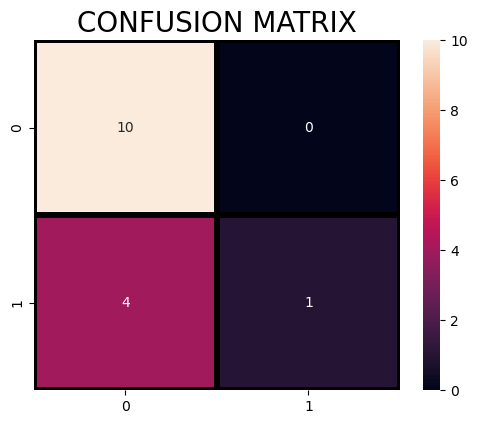

In [101]:
# from sklearn.metrics import recall_score, precision_score, classification_report,accuracy_score,confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(x_train,y_train)
prediction=knn_model.predict(x_test)
print('Validation accuracy of KNN is', accuracy_score(prediction,y_test))
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

# Decision Tree

Validation accuracy of Decision Tree is 0.6666666666666666

Classification report :
               precision    recall  f1-score   support

           1       1.00      0.50      0.67        10
           2       0.50      1.00      0.67         5

    accuracy                           0.67        15
   macro avg       0.75      0.75      0.67        15
weighted avg       0.83      0.67      0.67        15



Text(0.5, 1.0, 'CONFUSION MATRIX')

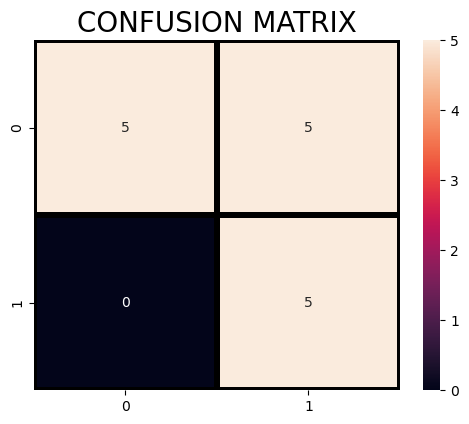

In [102]:
from sklearn.tree import DecisionTreeClassifier
ds_model = DecisionTreeClassifier(max_depth=1, random_state=13)

ds_model.fit(x_train,y_train)

prediction=ds_model.predict(x_test)

print('Validation accuracy of Decision Tree is', accuracy_score(prediction,y_test))
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)